<a href="https://colab.research.google.com/github/JaeWill/dsst_289_googleColab/blob/main/notebooks/nb/notebook03a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

As always, we start by loading our modules and doing a bit of set up:



In [1]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_minimal())
ubase = "https://raw.githubusercontent.com/distant-viewing/hdpy/refs/heads/main/"



## Food Dataset: Data Manipulation

To get started, we'll read the food dataset once again into Python:



In [7]:
food = pd.read_csv(ubase + "data/food.csv")
food

,item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color
0,Apple,fruit,52,0.1,0.028,0,1,13.81,2.4,10.39,0.26,1,1,8,apple,"A common, round fruit produced by the tree <i>...",red
1,Asparagus,vegetable,20,0.1,0.046,0,2,3.88,2.1,1.88,2.20,12,15,9,asparagus,Any of various perennial plants of the genus <...,green
2,Avocado,fruit,160,14.6,2.126,0,7,8.53,6.7,0.66,2.00,3,3,17,avocado,"The large, usually yellowish-green or black, p...",green
3,Banana,fruit,89,0.3,0.112,0,1,22.84,2.6,12.23,1.09,1,1,15,banana,An elongated curved tropical fruit that grows ...,yellow
4,Chickpea,grains,180,2.9,0.309,0,243,29.98,8.6,5.29,9.54,17,0,3,chickpea,An annual Asian plant (<i>Cicer arietinum</i>)...,brown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Tomato,vegetable,18,0.0,0.046,0,5,3.92,1.2,2.63,0.88,2,17,21,tomato,"A widely cultivated plant, <i>Solanum lycopers...",red
57,Tuna,fish,153,3.9,0.811,53,366,0.41,0.0,0.09,27.30,5,3,4,tuna,Any of several species of fish of the genus <i...,red
58,Turkey,meat,187,7.0,1.999,77,69,0.00,0.0,0.00,28.90,8,0,0,turkey_(bird),Either of two species of bird in the genus <i>...,white
59,Potato,vegetable,104,2.0,0.458,0,254,19.36,1.7,0.82,1.66,2,2,12,potato,"A plant tuber, <i>Solanum tuberosum</i>, eaten...",white




Now, with the new functions you've learned, create counts of the number of food
items in each food group. Note: Don't literally do this for each food group. There
is a simplier way!



In [10]:
counts = food.groupby("food_group").size()
counts

,0
food_group,
dairy,4
fish,14
fruit,16
grains,5
meat,6
vegetable,16




Next, create a dataset called `food_group_cnt` that has two columns, one with the
food group name and another with thee number of items in each food group. Make the
dataset show up in the notebook after you have created it so that we can verify that
it looks as expected.



In [13]:
food_group_cnt = food["food_group"].value_counts().reset_index()
food_group_cnt.columns=["food_group","counts"]
food_group_cnt

,food_group,counts
0,fruit,16
1,vegetable,16
2,fish,14
3,meat,6
4,grains,5
5,dairy,4




With your new dataset, use a col (short for column) geometry to show the food groups
on the x-axis and the number of items in each food group on the y-axis.



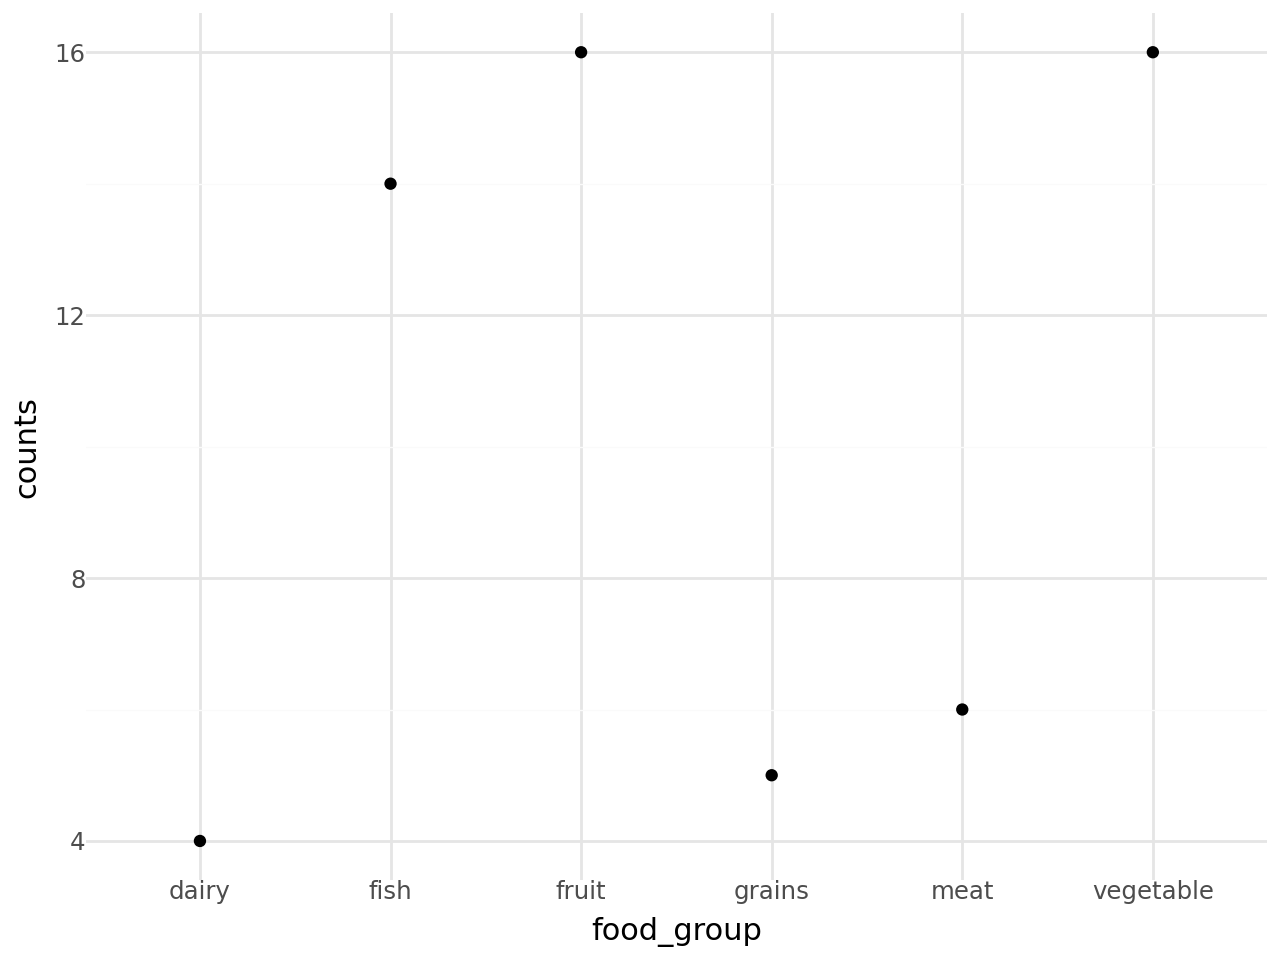

In [17]:
(ggplot(food_group_cnt) +
  geom_point(aes(x = "food_group", y = "counts")))



Let's now use some of our new row selection logic. Create a new dataset called `food_dairy`
consisting of only those items that are from the "dairy" food group. Print out the dataset
in the notebook by putting the name as an extra line in the code.



In [25]:
food_dairy = food[food["food_group"] == "dairy"]
food_dairy

,item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color
16,Cheese,dairy,350,26.9,16.609,83,955,4.71,0.0,3.54,22.21,3,16,0,cheese,A dairy product made from curdled or cultured ...,yellow
34,Milk,dairy,60,3.2,1.865,10,40,4.52,0.0,5.26,3.22,0,2,0,milk,A white liquid produced by the mammary glands ...,white
51,Sour Cream,dairy,214,20.9,13.047,44,53,4.27,0.0,0.16,3.16,0,13,2,sour_cream,Cream which has been treated with a benign bac...,white
60,Yogurt,dairy,99,1.1,0.742,5,53,18.64,0.0,18.64,3.98,0,1,1,yogurt,A milk-based product stiffened by a bacterium-...,white




Next, using the `food` dataset build a scatter plot with total fat on the x-axis and the
calories on the y-axis. Try to do this without looking at your notes!



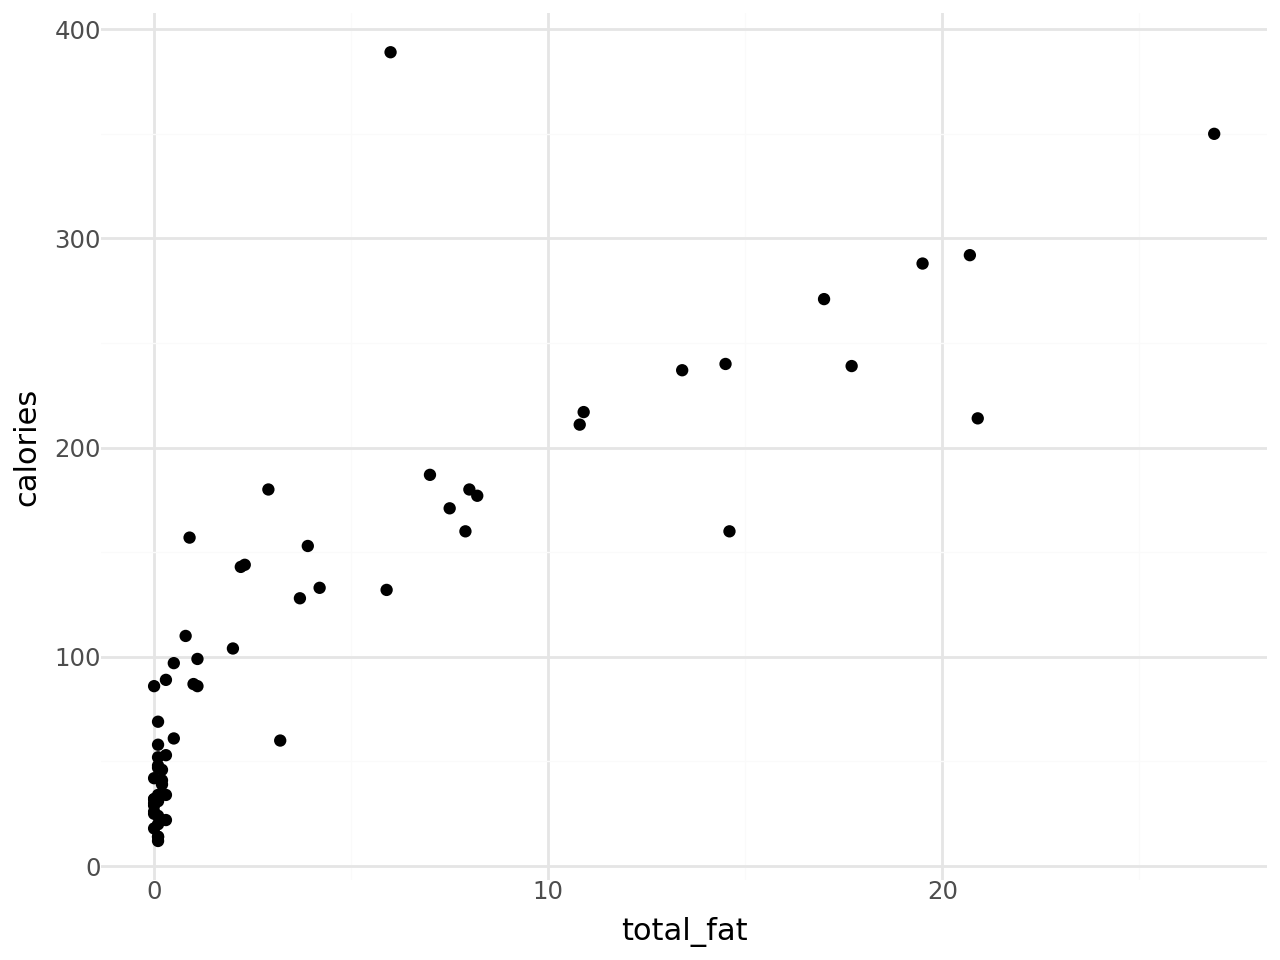

In [26]:
(ggplot(food) +
  geom_point(aes(x = "total_fat", y = "calories")))

# New Section

Finally, we will create a more complex plot with multiple layers. The first layer should
have all of the food data as points with total fat on the x-axis and the calories on the
y-axis. Make the color "#eeeeee" (it's a very light grey). The second layer will have
a scatterplot with just the dairy items in the color "olivedrab". Finally, the third layer
will have text labels for the dairy food items. Nudge the labels a bit so that we can easily
see both the labels and the points for the dairy data.



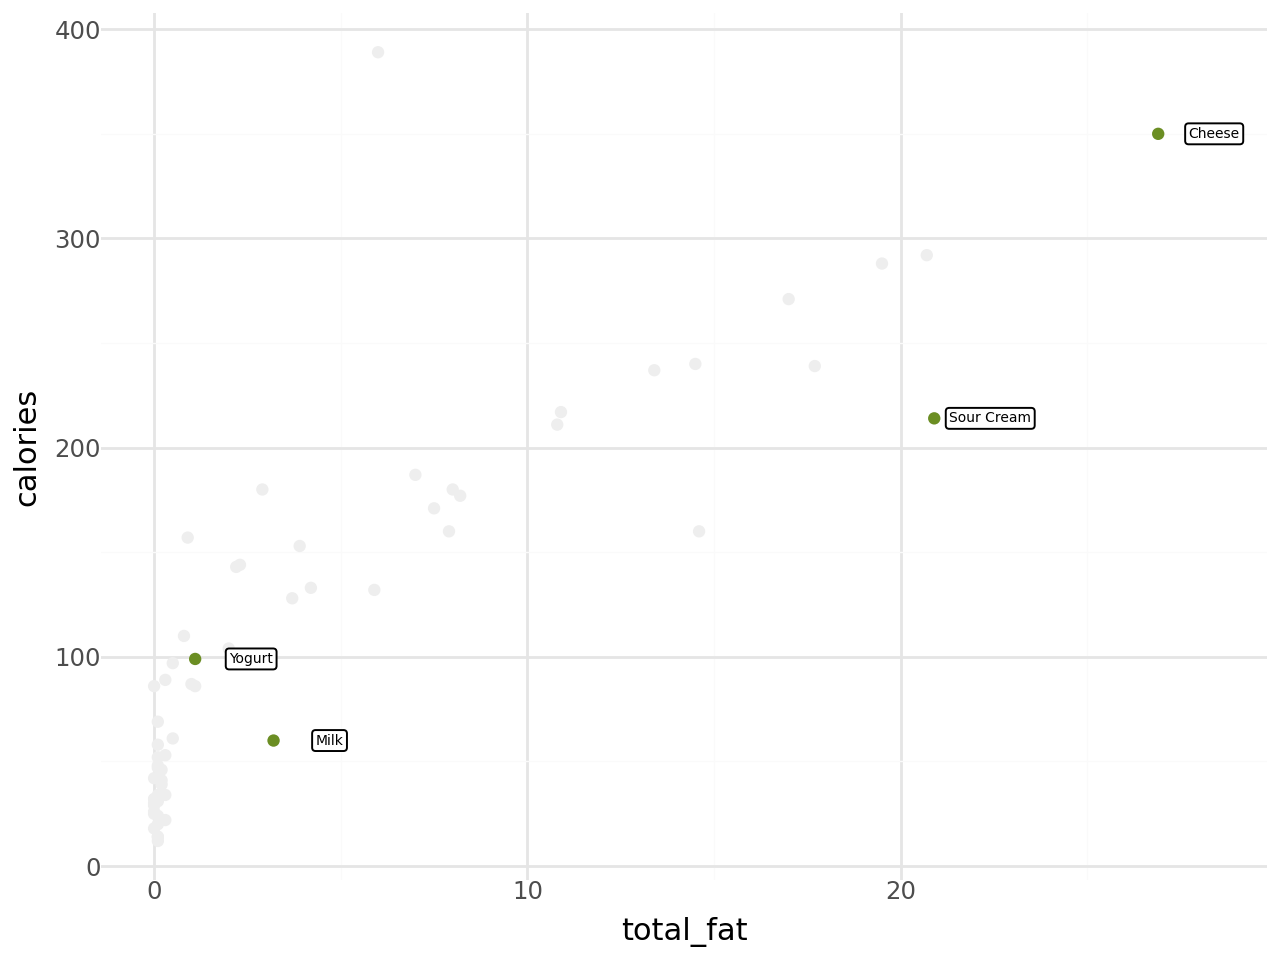

In [44]:
(ggplot(food, aes(x = "total_fat", y = "calories")) +
  geom_point(color = "#eeeeee") +
  geom_point(data = food_dairy, color = "olivedrab", mapping = aes(x="total_fat", y = "calories")) +
  geom_label(data = food_dairy, mapping = aes(x = "total_fat", y = "calories", label = "item"), position = position_nudge(x = 1.5), size = 5))



This kind of plot allows us understand a subset of our data in relation to the larger dataset. It
also helps us include some text labels without having so many that we can't read them easily.

## Lists: A Core Python Collection

As a final step, let's learn about a basic type of Python object called a list (we'll see a few
more basic types soon). A list is an ordered collection of items; the items can be of any type.
To create a list, we use square brackets with the elements seperated by commas. Here is an example
of a list of five numbers:



In [3]:
obj = [1, 5, 12, 2, 17]
obj

[1, 5, 12, 2, 17]



There are a lot of special methods we can use with lists, but for now our main reason for using
lists will be to provide a list of strings giving one or more column names. For example, we can
create a list like this:



In [4]:
obj = ["total_fat", "food_group", "sugar"]
obj

['total_fat', 'food_group', 'sugar']



We can use lists of column names to select a subset of columns from a DataFrame:



In [5]:
food.loc[:, ["total_fat", "food_group", "sugar"]]

,total_fat,food_group,sugar
0,0.1,fruit,10.39
1,0.1,vegetable,1.88
2,14.6,fruit,0.66
3,0.3,fruit,12.23
4,2.9,grains,5.29
...,...,...,...
56,0.0,vegetable,2.63
57,3.9,fish,0.09
58,7.0,meat,0.00
59,2.0,vegetable,0.82




The other way that we can use lists is in combination with the method, which checks
if a value is equal to at least one element of a list. This allows us, for example,
to easily get all food items from two groups:



In [6]:
food.loc[food['food_group'].isin(["dairy", "meat"]), :]

,item,food_group,calories,total_fat,sat_fat,cholesterol,sodium,carbs,fiber,sugar,protein,iron,vitamin_a,vitamin_c,wiki,description,color
6,Beef,meat,288,19.5,7.731,87,384,0.00,0.0,0.00,26.33,15,0,0,beef,"The meat from a cow, bull or other bovine.",red
16,Cheese,dairy,350,26.9,16.609,83,955,4.71,0.0,3.54,22.21,3,16,0,cheese,A dairy product made from curdled or cultured ...,yellow
17,Chicken,meat,237,13.4,3.758,87,404,0.00,0.0,0.00,27.07,7,3,0,chicken,"A domestic fowl, <i>Gallus gallus</i>, especia...",white
22,Duck,meat,132,5.9,2.320,77,74,0.00,0.0,0.00,18.28,13,2,10,duck,"An aquatic bird of the family <i>Anatidae</i>,...",red
29,Lamb,meat,292,20.7,8.756,96,394,0.00,0.0,0.00,24.32,10,0,0,sheep,A young sheep.,red
34,Milk,dairy,60,3.2,1.865,10,40,4.52,0.0,5.26,3.22,0,2,0,milk,A white liquid produced by the mammary glands ...,white
45,Pork,meat,271,17.0,6.168,90,384,0.00,0.0,0.00,27.34,6,1,1,pork,The meat of a pig; swineflesh.,white
51,Sour Cream,dairy,214,20.9,13.047,44,53,4.27,0.0,0.16,3.16,0,13,2,sour_cream,Cream which has been treated with a benign bac...,white
58,Turkey,meat,187,7.0,1.999,77,69,0.00,0.0,0.00,28.90,8,0,0,turkey_(bird),Either of two species of bird in the genus <i>...,white
60,Yogurt,dairy,99,1.1,0.742,5,53,18.64,0.0,18.64,3.98,0,1,1,yogurt,A milk-based product stiffened by a bacterium-...,white
